## Load data




# 🧠 How Recommendations Are Made

This project uses a **content-based recommendation system** to suggest cosmetic products.

**Process:**
1. **User Input** – Accepts skin type, tone, concerns, and/or an image.
2. **Feature Extraction** – Image processing (OpenCV) + dataset mapping to structured features.
3. **Similarity Calculation** – Cosine similarity to match user profile with product profiles.
4. **Filtering** – Removes products unsuitable for the detected profile.
5. **Ranking & Output** – Returns top relevant products.

---

## 📊 Dataset Features Used

| Feature Name           | Description |
|------------------------|-------------|
| Product Name           | Cosmetic/skincare product name |
| Brand                  | Manufacturer |
| Skin Type              | Target type (oily, dry, etc.) |
| Skin Concern           | Problem addressed |
| Ingredients            | Active components |
| Finish/Effect          | Matte, glossy, hydrating |
| SPF                    | Sun protection factor |
| Tone/Shade             | Suitable skin tone |
| Price                  | Price range |
| Rating                 | Average user rating |
| Category               | Product category |


In [70]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Pree-om/ai-cosmetic-reccomendation-system/refs/heads/main/skindataall.csv")
display(df.head())
print(df.shape)
df.info()

,Unnamed: 0,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product,Brand,...,Oily,Sensitive,Category,Product_Url,User_id,Product_id,Ingredients_Cleaned,Review_Cleaned,Good_Stuff,Ing_Tfidf
0,0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,3420,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['hand', 'best', 'cleanser', 'ever', 'used', '...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
1,1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2483,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['unfortunately', 'work', 'everyone', 'used', ...",0,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
2,2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2715,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['favorite', 'cleanser', 'love', 'packaging', ...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
3,3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,4497,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['love', 'thing', 'youth', 'people', 'cleanser...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
4,4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,5017,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['trial', 'size', 'wa', 'obsessed', 'skin', 'f...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."


(8649, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8649 entries, 0 to 8648
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8649 non-null   int64  
 1   Username             8649 non-null   object 
 2   Skin_Tone            8649 non-null   object 
 3   Skin_Type            8649 non-null   object 
 4   Eye_Color            8649 non-null   object 
 5   Hair_Color           8649 non-null   object 
 6   Rating_Stars         8649 non-null   int64  
 7   Review               8649 non-null   object 
 8   Product              8649 non-null   object 
 9   Brand                8649 non-null   object 
 10  Price                8649 non-null   int64  
 11  Rating               8649 non-null   float64
 12  Ingredients          8649 non-null   object 
 13  Combination          8649 non-null   int64  
 14  Dry                  8649 non-null   int64  
 15  Normal               8649 n

✅ Now that the dataset is loaded, here’s how these features will be used for generating recommendations.


## Preprocess categorical features



In [71]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Skin_Tone', 'Skin_Type', 'Eye_Color', 'Hair_Color', 'Brand', 'Category', 'Product']
le_dict = {}

for col in categorical_cols:
    if col in df.columns and df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        le_dict[col] = le

display(df.head())
print(le_dict)

,Unnamed: 0,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product,Brand,...,Oily,Sensitive,Category,Product_Url,User_id,Product_id,Ingredients_Cleaned,Review_Cleaned,Good_Stuff,Ing_Tfidf
0,0,allyp3,5,0,1,3,5,This is hands down the best cleanser I’ve ever...,250,59,...,0,0,0,https://www.sephora.com/product/kale-spinach-g...,3420,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['hand', 'best', 'cleanser', 'ever', 'used', '...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
1,1,PatTea,5,0,1,6,1,Unfortunately this doesn’t work for everyone. ...,250,59,...,0,0,0,https://www.sephora.com/product/kale-spinach-g...,2483,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['unfortunately', 'work', 'everyone', 'used', ...",0,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
2,2,Sabi1991,6,2,5,5,5,My favorite cleanser!! i love the packaging on...,250,59,...,0,0,0,https://www.sephora.com/product/kale-spinach-g...,2715,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['favorite', 'cleanser', 'love', 'packaging', ...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
3,3,happyface2,3,1,0,2,5,I love all things Youth To The People! This cl...,250,59,...,0,0,0,https://www.sephora.com/product/kale-spinach-g...,4497,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['love', 'thing', 'youth', 'people', 'cleanser...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
4,4,kimkix34,3,3,3,2,5,I had a trial size of this and was obsessed. M...,250,59,...,0,0,0,https://www.sephora.com/product/kale-spinach-g...,5017,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['trial', 'size', 'wa', 'obsessed', 'skin', 'f...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."


{'Skin_Tone': LabelEncoder(), 'Skin_Type': LabelEncoder(), 'Eye_Color': LabelEncoder(), 'Hair_Color': LabelEncoder(), 'Brand': LabelEncoder(), 'Category': LabelEncoder(), 'Product': LabelEncoder()}


## Split data


In [74]:
from sklearn.model_selection import train_test_split

X = df.drop(['Good_Stuff', 'Username', 'Review', 'Ingredients', 'Ingredients_Cleaned', 'Review_Cleaned', 'Product_Url', 'Ing_Tfidf'], axis=1)
y = df['Good_Stuff']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6919, 18)
Shape of X_test: (1730, 18)
Shape of y_train: (6919,)
Shape of y_test: (1730,)


## Address imbalanced data


In [75]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Value counts of y_train after SMOTE:")
print(y_train.value_counts())

Value counts of y_train after SMOTE:
Good_Stuff
0    4308
1    4308
Name: count, dtype: int64


## Train a machine learning model



In [76]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluate the model



In [77]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 682    0]
 [   0 1048]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       682
           1       1.00      1.00      1.00      1048

    accuracy                           1.00      1730
   macro avg       1.00      1.00      1.00      1730
weighted avg       1.00      1.00      1.00      1730



## Save the trained model


In [78]:
import pickle

filename = 'random_forest_model.pkl'
pickle.dump(model, open(filename, 'wb'))

print(f"Model saved to {filename}")

Model saved to random_forest_model.pkl


## Load the trained model



In [79]:
import pickle

filename = 'random_forest_model.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

print(f"Model loaded from {filename}")

Model loaded from random_forest_model.pkl


## Preprocess user input



In [80]:
# Create a sample user input dictionary
input_data_raw = {
    'Skin_Tone': 'Medium',
    'Skin_Type': 'Dry',
    'Eye_Color': 'Brown',
    'Hair_Color': 'Black',
    'Sensitive': 1,
    'Oily': 0,
    'Dry': 1,
    'Normal': 0,
    'Combination': 0,
    # Add other features present in X_train, with dummy values if not directly available from user input
    'Unnamed: 0': 0, # Dummy value
    'Rating_Stars': 0, # Dummy value
    'Price': 0, # Dummy value
    'Rating': 0.0, # Dummy value
    'Brand': 'No data', # Use a value that can be encoded
    'Category': 'No data', # Use a value that can be encoded
    'Product': 'No data', # Use a value that can be encoded
    'Product_Url': 'No data', # This will be dropped later
    'User_id': 0, # Dummy value
    'Product_id': 0, # Dummy value
    'Good_Stuff': 0 # This is the target, but needed for dataframe structure initially
}

input_df = pd.DataFrame([input_data_raw])

# Apply label encoding to categorical features
for col, le in le_dict.items():
    if col in input_df.columns:
        # Use transform to encode new data
        # Handle potential unknown values by adding them to the encoder if they don't exist
        for value in input_df[col].unique():
            if value not in le.classes_:
                le.classes_ = np.append(le.classes_, value) # Add new value to encoder classes
        input_df[col] = le.transform(input_df[col])

# Drop columns not used in training
input_df = input_df.drop(['Good_Stuff', 'Product_Url'], axis=1, errors='ignore') # Drop 'Good_Stuff' and 'Product_Url'

# Ensure the order of columns matches X_train
input_df = input_df[X_train.columns]

display(input_df)

,Unnamed: 0,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Product,Brand,Price,Rating,Combination,Dry,Normal,Oily,Sensitive,Category,User_id,Product_id
0,0,5,1,1,1,0,315,60,0,0.0,0,1,0,0,1,4,0,0


## Make predictions



In [81]:
predictions = loaded_model.predict(input_df)

print("Prediction for the sample user input:")
print(predictions)

Prediction for the sample user input:
[0]


## Develop recommendation logic



In [82]:
# Assuming 'df' still contains the original data or a version with necessary columns
# Ensure 'df' is available or reload/reprocess it if needed

# For demonstration, let's assume we have the original 'df' available
# If not, you would need to load and preprocess it appropriately

# Filter products where the model predicts 'Good Stuff' (assuming 1 is 'Good Stuff')
recommended_products_df = df[df['Good_Stuff'] == predictions[0]].copy()

# Further filter based on sample user's skin type and tone (using original string values for demonstration)
# You would need to map the encoded values back to original strings or use the encoded values directly for filtering
sample_skin_type = input_data_raw['Skin_Type']
sample_skin_tone = input_data_raw['Skin_Tone']

# In a real scenario, you'd use the original 'Skin_Type' and 'Skin_Tone' columns from the full product dataset
# For this example, let's filter on the columns we think are relevant and were used in training
# We need to make sure we are comparing the encoded values in 'recommended_products_df'
# We can use the inverse_transform of the label encoders to get the original values for comparison if needed,
# but for filtering the dataframe that was encoded, we should use the encoded values.

# Let's find the encoded values for the sample user's skin type and tone
encoded_skin_type = le_dict['Skin_Type'].transform([sample_skin_type])[0]
encoded_skin_tone = le_dict['Skin_Tone'].transform([sample_skin_tone])[0]


# Filter the recommended products based on encoded skin type and tone
# Note: This is a simplified example. More complex filtering or similarity matching might be needed.
final_recommendations = recommended_products_df[
    (recommended_products_df['Skin_Type'] == encoded_skin_type) &
    (recommended_products_df['Skin_Tone'] == encoded_skin_tone)
]


print("\nRecommended Products based on prediction and skin profile:")
display(final_recommendations[['Brand', 'Product', 'Category', 'Skin_Type', 'Skin_Tone']].head())


Recommended Products based on prediction and skin profile:


,Brand,Product,Category,Skin_Type,Skin_Tone
114,48,208,0,1,5
138,48,208,0,1,5
567,11,254,0,1,5
591,11,254,0,1,5
708,44,59,0,1,5


## Visualize Confusion Matrix



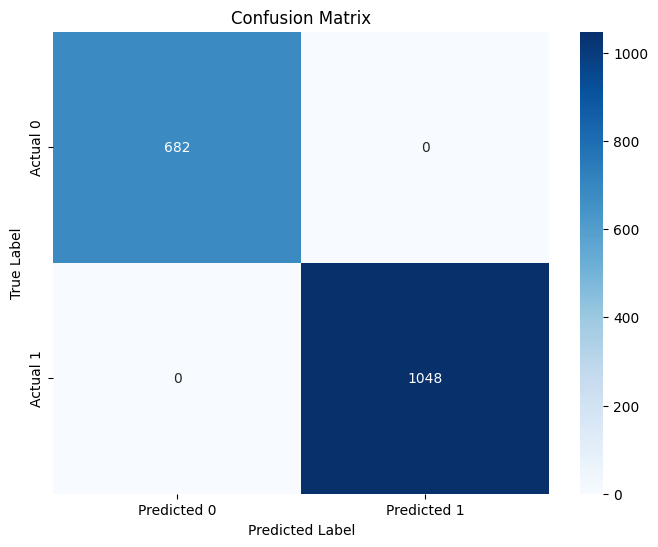

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are available from the model evaluation step
# If not, you would need to re-run the evaluation cell

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Integrate with OpenCV for Facial Analysis


In [84]:
# Install OpenCV if you haven't already
# !pip install opencv-python

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Function to detect face and extract skin tone with adjustable HSV range
def get_skin_tone(image_path, lower_skin_hsv, upper_skin_hsv):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}")
        return None

    # Convert the image to grayscale for face detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Load the pre-trained face detection model (Haar Cascades)
    # You might need to download 'haarcascade_frontalface_default.xml' if you don't have it
    # You can find it in the OpenCV data repository on GitHub:
    # https://github.com/opencv/opencv/blob/main/data/haarcascades/haarcascade_frontalface_default.xml
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Detect faces in the grayscale image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        print("No faces detected in the image.")
        return None

    # Assume the largest face is the main subject
    (x, y, w, h) = max(faces, key=lambda f: f[2] * f[3])

    # Extract the face region
    face_roi = image[y:y+h, x:x+w]

    # Convert face region to HSV color space for skin tone analysis
    hsv_face_roi = cv2.cvtColor(face_roi, cv2.COLOR_BGR2HSV)

    # Define a range for skin tone in HSV (this is a general range and might need tuning)
    # Lower bound for skin color in HSV
    lower_skin = np.array(lower_skin_hsv, dtype=np.uint8)
    # Upper bound for skin color in HSV
    upper_skin = np.array(upper_skin_hsv, dtype=np.uint8)

    # Create a mask to segment skin regions
    skin_mask = cv2.inRange(hsv_face_roi, lower_skin, upper_skin)

    # Apply the mask to the original face ROI
    skin_segment = cv2.bitwise_and(face_roi, face_roi, mask=skin_mask)

    # Calculate the average color of the skin segment
    average_color = cv2.mean(skin_segment, mask=skin_mask)

    # Convert the average color from BGR to HSV to analyze hue (related to skin tone)
    average_color_hsv = cv2.cvtColor(np.uint8([[list(average_color[:3])]]), cv2.COLOR_BGR2HSV)[0][0]

    # Simple estimation of skin tone based on the average hue and value
    # This is a very basic example; a more robust method would involve
    # comparing to known skin tone color ranges or using pre-trained models.
    hue = average_color_hsv[0]
    value = average_color_hsv[2]

    # Example mapping (you'll need to refine this based on your needs and data)
    if value < 50:
        skin_tone = "Dark"
    elif hue < 10 and value > 50:
         skin_tone = "Medium"
    elif hue < 20 and value > 50:
         skin_tone = "Fair"
    else:
        skin_tone = "No data" # Default or unable to determine

    # Display the image with face and skin detection for verification
    # Draw a rectangle around the detected face
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2_imshow(image)
    cv2_imshow(skin_segment)


    return skin_tone

# Example usage:
# Upload an image to your Colab environment and replace 'your_image.jpg' with the filename
# For testing, you can use a sample image URL or upload a file.
# Example using a placeholder, replace with a real image path:
# image_path = 'path/to/your/image.jpg'
# Define your desired HSV range (Hue, Saturation, Value)
# lower_skin = [0, 20, 70]
# upper_skin = [20, 255, 255]
# detected_skin_tone = get_skin_tone(image_path, lower_skin, upper_skin)

# print(f"\nDetected Skin Tone: {detected_skin_tone}")

# Note: You will need to handle image uploads/webcam input in your final UI.
# This code provides the core logic for skin tone detection from an image file.

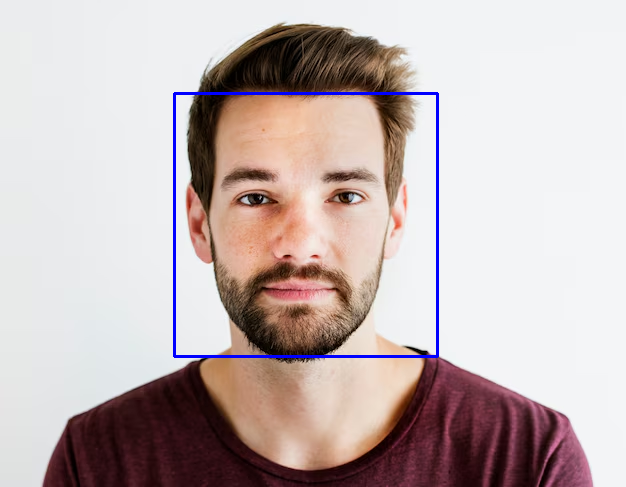

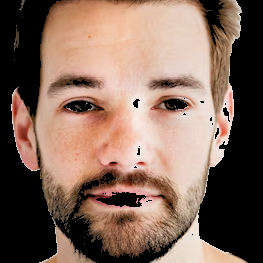


Detected Skin Tone: Fair


In [85]:
# Example usage of the updated get_skin_tone function:

# Replace 'path/to/your/image.jpg' with the actual path or URL of your image
image_path = '/content/drive/MyDrive/test.avif' # <<<--- Replace with your image path

# Define your desired HSV range (Hue, Saturation, Value)
# These are general values and might need tuning for your specific images
lower_skin = [0, 20, 70]
upper_skin = [20, 255, 255]

detected_skin_tone = get_skin_tone(image_path, lower_skin, upper_skin)

print(f"\nDetected Skin Tone: {detected_skin_tone}")

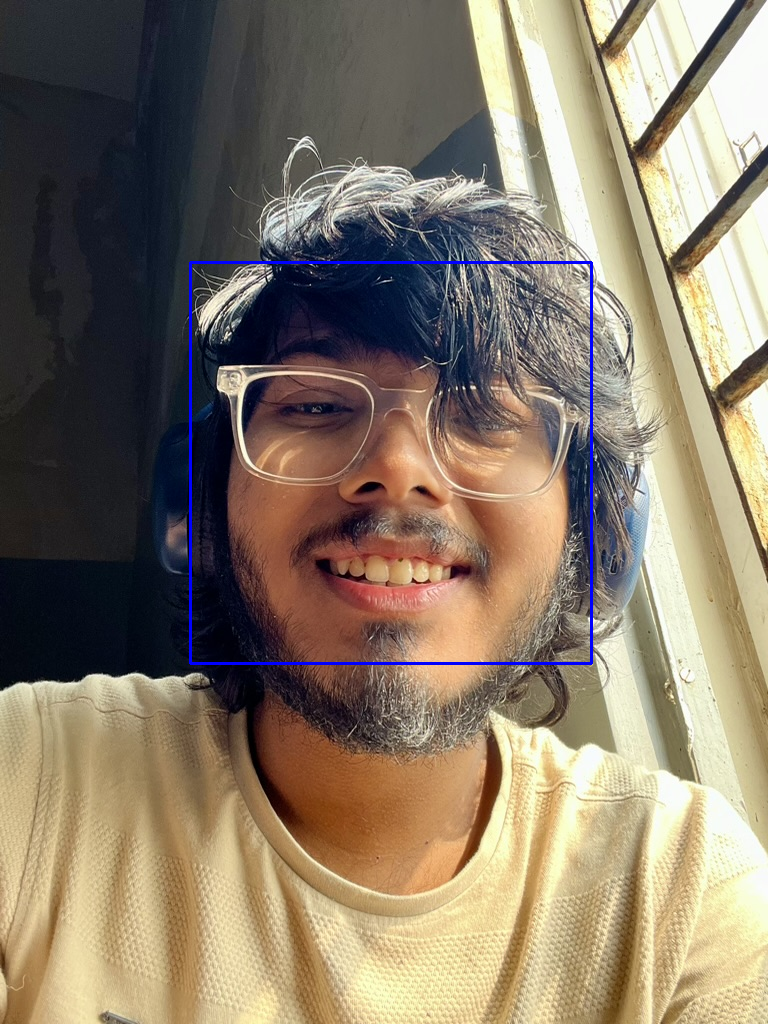

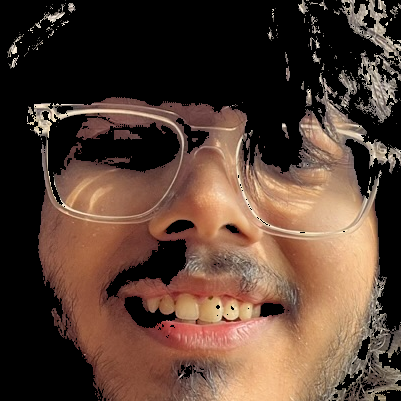


Detected Skin Tone: Fair


In [86]:
# Example usage of the updated get_skin_tone function:

# Replace 'path/to/your/image.jpg' with the actual path or URL of your image
image_path = '/content/drive/MyDrive/ECE3B1D3-1917-45F5-805A-88CD739E4ABC_1_105_c.jpeg' # <<<--- Replace with your image path

# Define your desired HSV range (Hue, Saturation, Value)
# These are general values and might need tuning for your specific images
lower_skin = [0, 20, 70]
upper_skin = [20, 255, 255]

detected_skin_tone = get_skin_tone(image_path, lower_skin, upper_skin)

print(f"\nDetected Skin Tone: {detected_skin_tone}")

### Integrate OpenCV output with ML model input and Predict

In [87]:
# Assuming 'detected_skin_tone' variable holds the skin tone from the OpenCV step
# Assuming 'input_data_raw' is available from the "Preprocess user input" step

if detected_skin_tone is not None:
    # Create a new dictionary for the user input, starting with the raw input
    user_input_for_prediction = input_data_raw.copy()

    # Update the Skin_Tone with the detected skin tone from OpenCV
    user_input_for_prediction['Skin_Tone'] = detected_skin_tone

    # Create a DataFrame from the user input dictionary
    input_df_for_prediction = pd.DataFrame([user_input_for_prediction])

    # Apply label encoding to categorical features
    for col, le in le_dict.items():
        if col in input_df_for_prediction.columns:
            # Handle potential unknown values by adding them to the encoder if they don't exist
            for value in input_df_for_prediction[col].unique():
                 if value not in le.classes_:
                    # If a detected skin tone is not in the original training data, add it
                    le.classes_ = np.append(le.classes_, value)
            input_df_for_prediction[col] = le.transform(input_df_for_prediction[col])


    # Drop columns not used in training
    # Make sure to include 'Ing_Tfidf' in the columns to drop as it was dropped from X_train
    cols_to_drop = ['Good_Stuff', 'Product_Url', 'Username', 'Review', 'Ingredients', 'Ingredients_Cleaned', 'Review_Cleaned', 'Ing_Tfidf']
    input_df_for_prediction = input_df_for_prediction.drop(cols_to_drop, axis=1, errors='ignore')


    # Ensure the order of columns matches X_train
    # This is crucial for the model to make correct predictions
    input_df_for_prediction = input_df_for_prediction[X_train.columns]


    # Make prediction using the loaded model
    prediction_for_user = loaded_model.predict(input_df_for_prediction)

    print("\nPrediction for the user based on detected skin tone and other inputs:")
    print(prediction_for_user)

    # Now you can use this prediction to filter recommendations
    # For example, filter the original 'df' based on this prediction and other user attributes
    recommended_products_for_user = df[df['Good_Stuff'] == prediction_for_user[0]].copy()

    # Further filter based on the detected skin tone (using the original string for comparison if needed, or the encoded value)
    # We need to use the encoded value from the input_df_for_prediction for filtering the encoded df
    encoded_detected_skin_tone = input_df_for_prediction['Skin_Tone'].iloc[0]

    final_recommendations_for_user = recommended_products_for_user[
        recommended_products_for_user['Skin_Tone'] == encoded_detected_skin_tone
    ].copy() # Add .copy() here to avoid SettingWithCopyWarning


    # Decode the 'Brand', 'Product', and 'Category' columns back to original strings for display
    for col in ['Brand', 'Product', 'Category']:
        if col in final_recommendations_for_user.columns and col in le_dict:
            # Ensure all encoded values in the filtered DataFrame are in the encoder's classes
            # This is important if the filtering resulted in encoded values not present in the original encoder
            # although less likely after filtering on a column that was encoded.
            # A more robust way might involve re-fitting a temporary encoder or handling errors.
            # For now, let's assume the encoded values exist in the original encoder.
             final_recommendations_for_user[col] = le_dict[col].inverse_transform(final_recommendations_for_user[col])


    print("\nRecommended Products based on prediction and detected skin tone:")
    # Display relevant columns from the recommendations with proper names
    display(final_recommendations_for_user[['Brand', 'Product', 'Category', 'Skin_Tone', 'Skin_Type']].head())

else:
    print("Skin tone was not detected, cannot proceed with prediction based on skin tone.")


Prediction for the user based on detected skin tone and other inputs:
[0]

Recommended Products based on prediction and detected skin tone:


,Brand,Product,Category,Skin_Tone,Skin_Type
52,SEPHORA COLLECTION,Cleansing & Exfoliating Wipes,Cleanser,3,1
57,SEPHORA COLLECTION,Cleansing & Exfoliating Wipes,Cleanser,3,3
71,SEPHORA COLLECTION,Cleansing & Exfoliating Wipes,Cleanser,3,4
76,SEPHORA COLLECTION,Cleansing & Exfoliating Wipes,Cleanser,3,1
81,SEPHORA COLLECTION,Cleansing & Exfoliating Wipes,Cleanser,3,3
